# Solution sur-raffinée pour FEM

In [19]:
from scar.geometry import Geometry2D
from scar.utils import get_class

import numpy as np
import matplotlib.pyplot as plt

import mshr
import dolfin as df
from dolfin import *

In [2]:
geom_class_name = "Bean"
geom_class = get_class(geom_class_name,Geometry2D)
form = geom_class()

# Maillage

In [3]:
def dist(pt1,pt2):
    return np.sqrt((pt1[0]-pt2[0])**2+(pt1[1]-pt2[1])**2)

def tri(c_t):
    n_bc_points = c_t.shape[0]
    c_t_tri = [c_t[0,:]]
    c_t = np.delete(c_t,0,axis=0)
    for _ in range(1,n_bc_points):
        pt1 = c_t_tri[-1]
        # point le plus proche de pt1
        dist_pts = [dist(pt1,c_t[i,:]) for i in range(len(c_t))]
        i_min = np.argmin(dist_pts)
        c_t_tri.append(c_t[i_min,:])
        c_t = np.delete(c_t,i_min,axis=0)
    return np.array(c_t_tri)

In [15]:
n_bc_points = 1000
t = np.linspace(0,1,n_bc_points)
c_t = form.c(t)
c_t = np.array(c_t.T)

c_t_tri = tri(c_t)
c_t_tri = np.concatenate([c_t_tri,np.array([c_t_tri[0]])],axis=0)

# plot polygon (sorted and unsorted)
# fig,axs = plt.subplots(1,2,figsize=(10,5))
# for i in range(n_bc_points-1):
#     axs[0].plot([c_t[i,0],c_t[i+1,0]],[c_t[i,1],c_t[i+1,1]],"black",linewidth=3)
#     axs[1].plot([c_t_tri[i,0],c_t_tri[i+1,0]],[c_t_tri[i,1],c_t_tri[i+1,1]],"black",linewidth=3)
# axs[1].plot([c_t_tri[-2,0],c_t_tri[-1,0]],[c_t_tri[-2,1],c_t_tri[-1,1]],"black",linewidth=3)

In [27]:
domain_vertices = [df.Point(c_t_tri[i,0],c_t_tri[i,1]) for i in range(n_bc_points)]
domain = mshr.Polygon(domain_vertices)
mesh_form = mshr.generate_mesh(domain, 100)

# shox mesh
# mesh_form

# Solve Poisson problem - FEM

In [29]:
V = FunctionSpace(mesh_form, "CG", 1)
dx = Measure("dx", domain=mesh_form)

In [31]:
g = Constant("0.0")
bc = DirichletBC(V, g, "on_boundary")

f_expr = Constant("1.0")

u = TrialFunction(V)
v = TestFunction(V)

# Resolution of the variationnal problem
a = inner(grad(u), grad(v)) * dx
l = f_expr * v * dx

A = df.assemble(a)
L = df.assemble(l)
bc.apply(A, L)

sol = Function(V)
solve(A,sol.vector(),L)


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


1

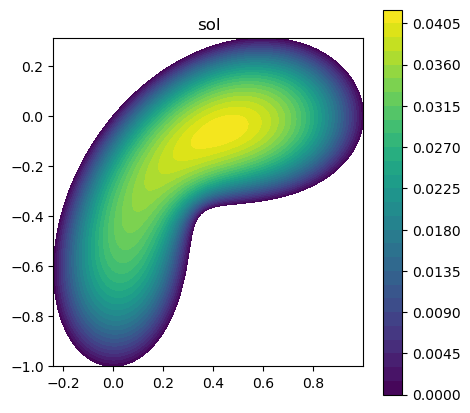

In [33]:
plt.figure(figsize=(5,5))
c = plot(sol, title="sol")
plt.colorbar(c)